## 1. OR 게이트 학습 및 시각화 (ANN)
- OR 게이트를 은닉층 1개를 이용해 분리하기
- 코드 분석 및 시각화

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Define OR GATE
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([[0], [1], [1], [1]])

- Define model w/ 1 hidden layer
    - Used sequential API cuz it's just a simple structure.
    - Used Sigmoid for the binary classification.

In [24]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 2), # input 2D -> hidden layer
            nn.Sigmoid(),
            nn.Linear(2, 1), # output layer
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

In [25]:
model = ANN()
criterion = nn.BCELoss() # loss function
optimizer = optim.SGD(model.parameters(), lr=0.1) # SGD

In [26]:
# Training
def train(epochs, X, y):
    for epoch in range(epochs):
        output = model(X)            # tensor with 4 probabilities(0-1)
        loss = criterion(output, y)  # compute the loss between the actual output y and the output of the model with BCE

        optimizer.zero_grad()        # initialize all the gradients in the previous epoch  
        loss.backward()              # backpropagation -> compute the gradient with respect to the model parameters
        optimizer.step()             # update the parameters(w, b) based on the computed gradients

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, loss: {loss.item():.4f}")

epochs = 10000
train(epochs, X, y)

Epoch 0, loss: 0.9114
Epoch 1000, loss: 0.2052
Epoch 2000, loss: 0.0486
Epoch 3000, loss: 0.0236
Epoch 4000, loss: 0.0150
Epoch 5000, loss: 0.0109
Epoch 6000, loss: 0.0084
Epoch 7000, loss: 0.0069
Epoch 8000, loss: 0.0058
Epoch 9000, loss: 0.0050


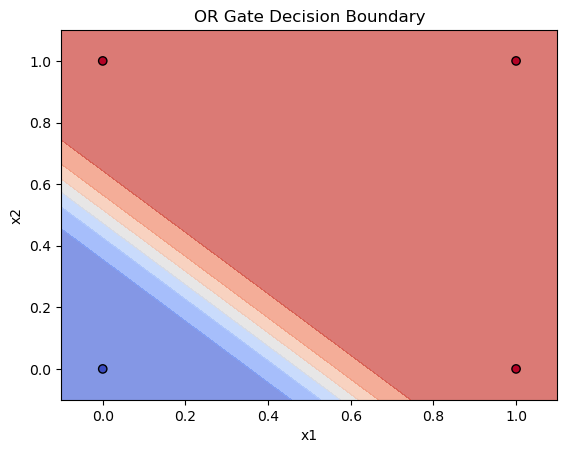

In [ ]:
# Visualize the decision boundary

def plot_OR_GATE(model):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)
    Z = Z.numpy()

    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap="coolwarm", edgecolors='k')
    plt.title("OR Gate Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

plot_OR_GATE(model)


## 2. XOR 게이트 학습 시도 및 한계 시각화 (ANN)
- XOR 게이트를 은닉층 1개를 이용해 분리하기
- 분리가 되지 않는 이유?

In [28]:
# Define XOR GATE
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([[0], [1], [1], [0]])

In [29]:
epochs = 10000
train(epochs, X, y)

Epoch 0, loss: 1.8836
Epoch 1000, loss: 0.4935
Epoch 2000, loss: 0.4887
Epoch 3000, loss: 0.4870
Epoch 4000, loss: 0.4859
Epoch 5000, loss: 0.4850
Epoch 6000, loss: 0.4843
Epoch 7000, loss: 0.4837
Epoch 8000, loss: 0.4832
Epoch 9000, loss: 0.4828


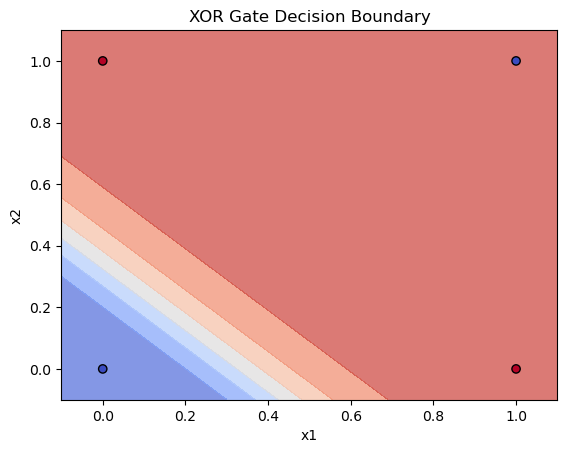

In [30]:
# Visualize the decision boundary

def plot_XOR_GATE(model):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)
    Z = Z.numpy()

    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap="coolwarm", edgecolors='k')
    plt.title("XOR Gate Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

plot_XOR_GATE(model)

## 3. XOR 게이트 학습 및 시각화 (DNN)
- XOR 게이트를 DNN을 이용해 분리하세요.
- 분리가 되는 이유를 적어주세요.
- 코드 분석과 시각화를 해주세요.

In [32]:
# DNN model (more than 2 hidden layers)
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 4),   # 1st hidden layer
            nn.ReLU(),
            nn.Linear(4, 4),   # 2nd hidden layer
            nn.ReLU(),
            nn.Linear(4, 1),   # Output layer
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [33]:
model = DNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [34]:
epochs = 10000
train(epochs, X, y)

Epoch 0, loss: 0.7157
Epoch 1000, loss: 0.0001
Epoch 2000, loss: 0.0000
Epoch 3000, loss: 0.0000
Epoch 4000, loss: 0.0000
Epoch 5000, loss: 0.0000
Epoch 6000, loss: 0.0000
Epoch 7000, loss: 0.0000
Epoch 8000, loss: 0.0000
Epoch 9000, loss: 0.0000


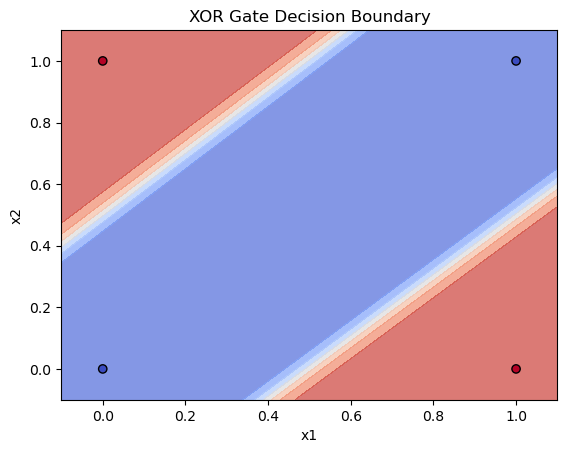

In [35]:
plot_XOR_GATE(model)